In [173]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import pickle, os

In [174]:
st_dir = os.path.join('.', 'st')
i = 2
with open('st%02i_objects.pkl' % (i, ), 'rb') as f:    
    st_objects = pickle.load(f)

In [175]:
n_frames = len(st_objects)
n_objects_by_frame = np.array([len(d) for d in st_objects])

In [176]:
# person_confidence = np.array([d['person'] if 'person' in d.keys() else 0 for d in st_objects])
# person_confidence_downsampled = np.array([x.mean() for x in np.split(person_confidence, len(person_confidence)/15)])
# person_confidence_downsampled -= person_confidence_downsampled.mean()
# person_confidence_downsampled /= person_confidence_downsampled.std()

# fig, ax = plt.subplots(2,1, figsize=(12, 6))
# ax[0].plot(person_confidence)
# ax[1].plot(person_confidence_downsampled)
# for a in ax:
#     a.set_ylabel('confidence')
# ax[0].set_xlabel('frame')
# ax[1].set_xlabel('t (s)')
# plt.tight_layout()
# plt.show()

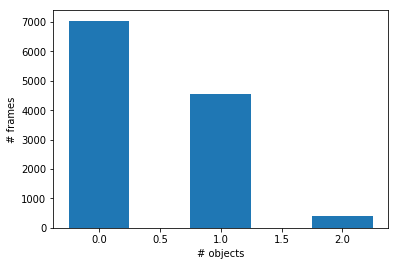

fraction frames with no objects: 0.587167


In [177]:
plt.hist(n_objects_by_frame, bins=n_objects_by_frame.max(), align='left', rwidth=0.5)
plt.xlabel('# objects')
plt.ylabel('# frames')
plt.show()
print('fraction frames with no objects: %f' % (n_objects_by_frame == 0).mean())

In [178]:
unique_objects = np.unique(np.concatenate([list(d.keys()) for d in st_objects]))
n_unique_objects = len(unique_objects)
object_index = dict(zip(unique_objects, range(n_unique_objects)))

In [179]:
objects_barcode = np.zeros((n_unique_objects, n_frames), dtype=bool)
for frame, d in enumerate(st_objects):
    for object in d:
        objects_barcode[object_index[object], frame] = True

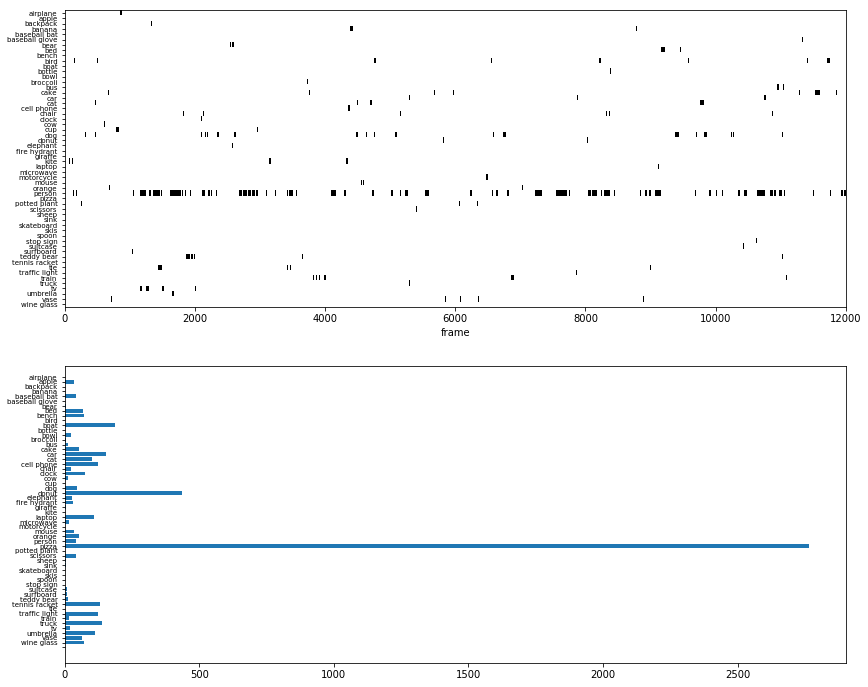

In [182]:
fig, ax = plt.subplots(2, 1, figsize=(14,12))
ax[0].imshow(objects_barcode, aspect='auto', cmap=plt.get_cmap('Greys'))
ax[0].set_xlabel('frame')
ax[0].set_yticks(range(n_unique_objects))
ax[1].barh(list(reversed(range(n_unique_objects))), objects_barcode.sum(1), align='center')
ax[1].set_yticks(range(n_unique_objects,-1,-1))
for a in ax:
    a.set_yticklabels(unique_objects, fontsize=7)
plt.show()

In [ ]:
if not os.path.exists('st_words.mp4'):
    st = np.load(os.path.join(st_dir, '%02i.npy' % (i, )))

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.axis('off')

    artists = [[ax.imshow(st[frame], aspect='equal')] 
               + [ax.text(64, 64, unique_objects[objects_barcode[:, frame]], ha='center', fontsize=24, color='r')] for frame in range(n_frames)]
    anim = ArtistAnimation(fig, artists, interval=1000./15.)
    anim.save('st_.mp4')

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<video controls><source src="st.mp4" type="video/mp4"></video>'))